## Set Up

In [21]:
# autoreload
%load_ext autoreload
%autoreload 2
# jupyter black formatter
%load_ext jupyter_black

import subprocess
import os
import sys

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "timescales"))
print("Working directory: ", os.getcwd())

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
Working directory:  /home/facosta/timescales/timescales
Directory added to path:  /home/facosta/timescales
Directory added to path:  /home/facosta/timescales/timescales


## Load Models from Sweep

In [2]:
from timescales.analysis.load_models import load_experiment_sweep
import torch

# sweep_dir = (
#     "/home/facosta/timescales/timescales/logs/experiments/timescales_sweep_20251002_064332"
# )

sweep_dir = "/home/facosta/timescales/timescales/logs/experiments/std_sweep_20251008_012654"


# sweep_dir = "/home/facosta/timescales/timescales/logs/experiments/batch_sweep_20251004_000019"

# sweep_dir = "/home/facosta/timescales/timescales/logs/experiments/single_timescales_sweep_20251005_094501"

device = "cuda" if torch.cuda.is_available() else "cpu"

models, metadata, summary = load_experiment_sweep(
    sweep_dir=sweep_dir,
    device=device,
    use_lightning_checkpoint=True,
    checkpoint_type="best",
)

⚠ sweep_summary.yaml not found (sweep may be incomplete)
Loading 27 experiments with 1 seeds each...
Total models to load: 27
Using Lightning checkpoints

Loading experiment: mean05_std_000
  ✓ Loaded mean05_std_000/seed_0
Loading experiment: mean_05_std_005
  ✓ Loaded mean_05_std_005/seed_0
Loading experiment: mean_05_std_010
  ✓ Loaded mean_05_std_010/seed_0
Loading experiment: mean_05_std_015
  ✓ Loaded mean_05_std_015/seed_0
Loading experiment: mean_05_std_020
  ✓ Loaded mean_05_std_020/seed_0
Loading experiment: mean_05_std_025
  ✓ Loaded mean_05_std_025/seed_0
Loading experiment: mean_05_std_030
  ✓ Loaded mean_05_std_030/seed_0
Loading experiment: mean_05_std_035
  ✓ Loaded mean_05_std_035/seed_0
Loading experiment: mean_05_std_040
  ✓ Loaded mean_05_std_040/seed_0
Loading experiment: mean_03_std_000
  ✓ Loaded mean_03_std_000/seed_0
Loading experiment: mean_03_std_005
  ✓ Loaded mean_03_std_005/seed_0
Loading experiment: mean_03_std_010
  ✓ Loaded mean_03_std_010/seed_0
Loading

In [22]:
models["mean05_std_000"][0]["config"]["timescales_config"]["std"]

0

In [23]:
# Filter models by mean timescale
models_mean_03 = {k: v for k, v in models.items() if "mean_03" in k}
models_mean_05 = {k: v for k, v in models.items() if "mean_05" in k or "mean05" in k}
models_mean_07 = {k: v for k, v in models.items() if "mean_07" in k}

# Verify the split
print(f"Mean 0.3: {len(models_mean_03)} experiments")
print(f"Mean 0.5: {len(models_mean_05)} experiments")
print(f"Mean 0.7: {len(models_mean_07)} experiments")
print(
    f"Total: {len(models_mean_03) + len(models_mean_05) + len(models_mean_07)} / {len(models)}"
)

Mean 0.3: 9 experiments
Mean 0.5: 9 experiments
Mean 0.7: 1 experiments
Total: 19 / 19


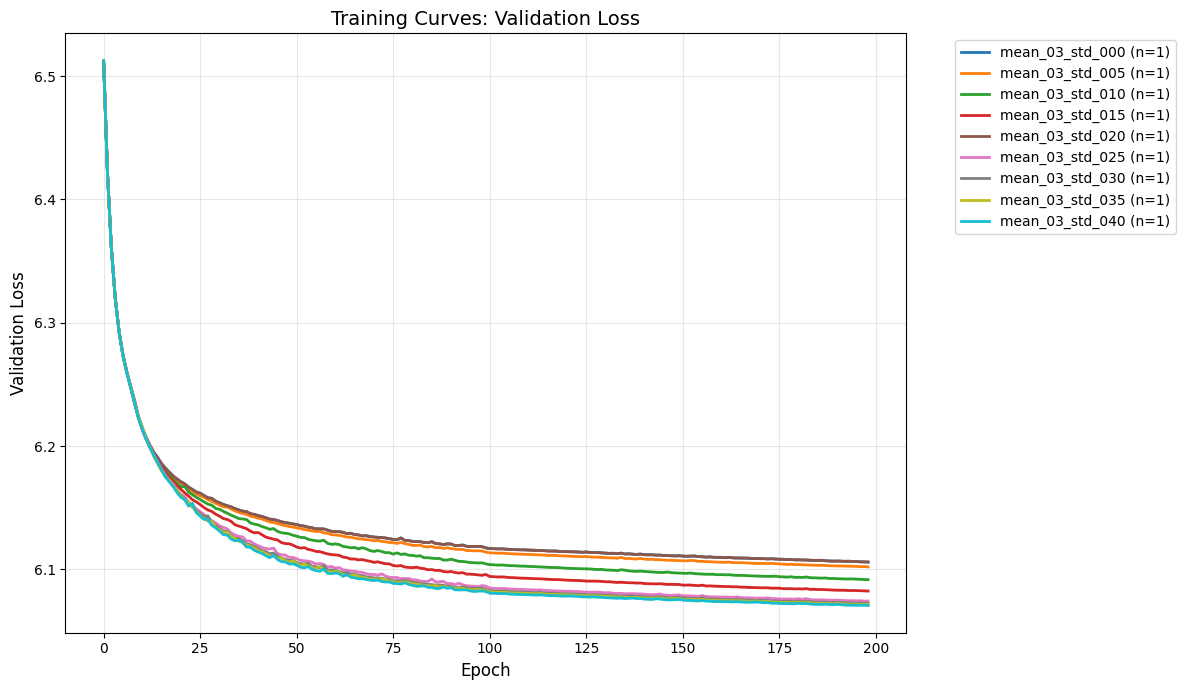

In [24]:
from timescales.analysis.plotting import create_color_mapping

# For std variations
colors_03 = create_color_mapping(
    models_mean_03, "viridis", ["timescales_config", "std"]
)
colors_05 = create_color_mapping(models_mean_05, "plasma", ["timescales_config", "std"])
colors_07 = create_color_mapping(
    models_mean_07, "coolwarm", ["timescales_config", "std"]
)

from timescales.analysis.plotting import plot_training_curves_sweep

# Plot with custom colors
plot_training_curves_sweep(models_mean_03, metric="val_loss", colors=colors_03)

## Plot Training Metrics

In [3]:
from timescales.analysis.plotting import plot_training_curves_sweep

### Training Loss

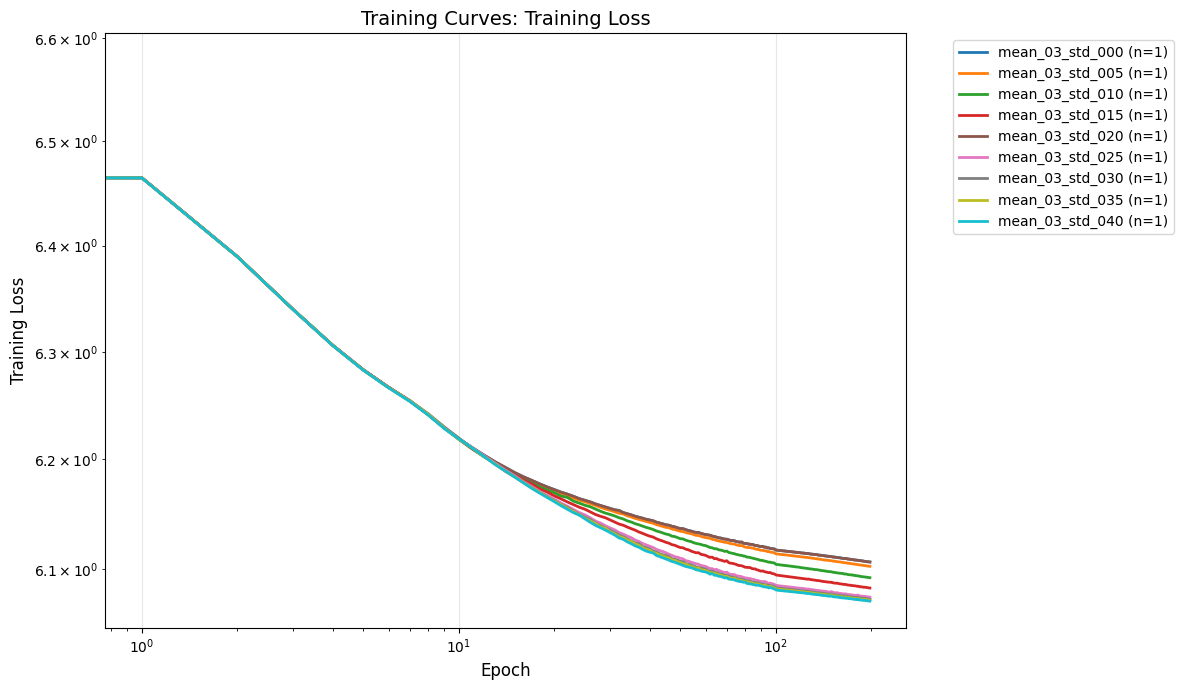

In [9]:
plot_training_curves_sweep(models_mean_03, metric="train_loss", log_x=True, log_y=True)

### Validation Loss

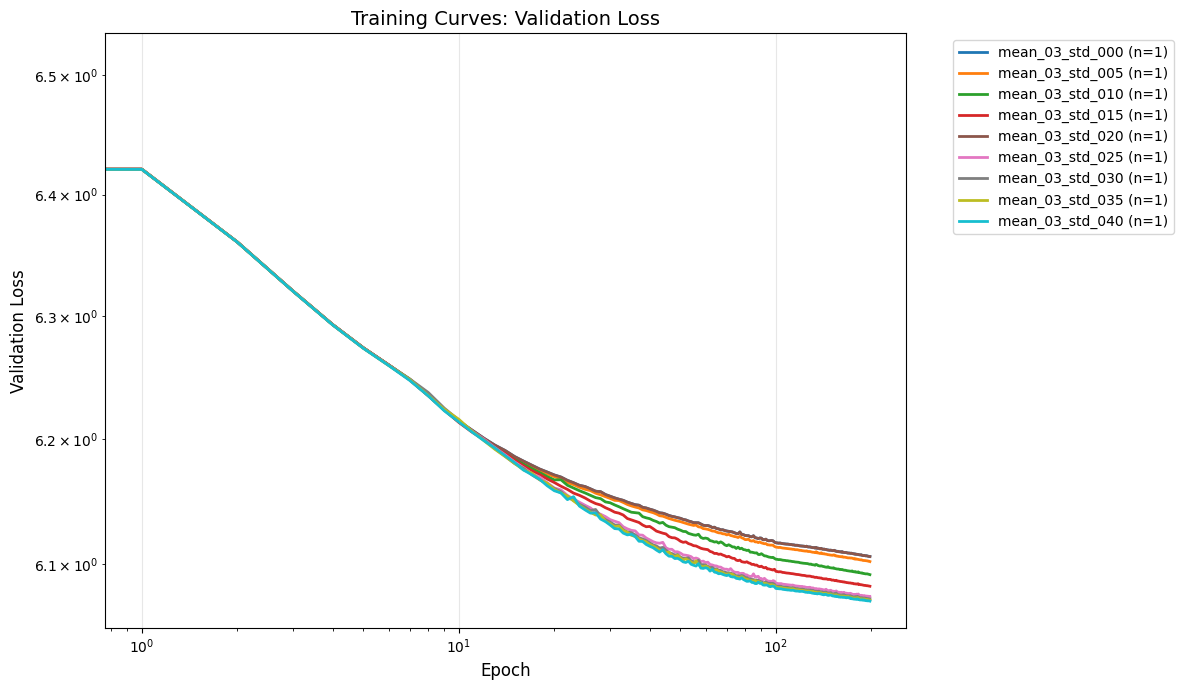

In [10]:
plot_training_curves_sweep(models_mean_03, metric="val_loss", log_x=True, log_y=True)

### Decoding Error

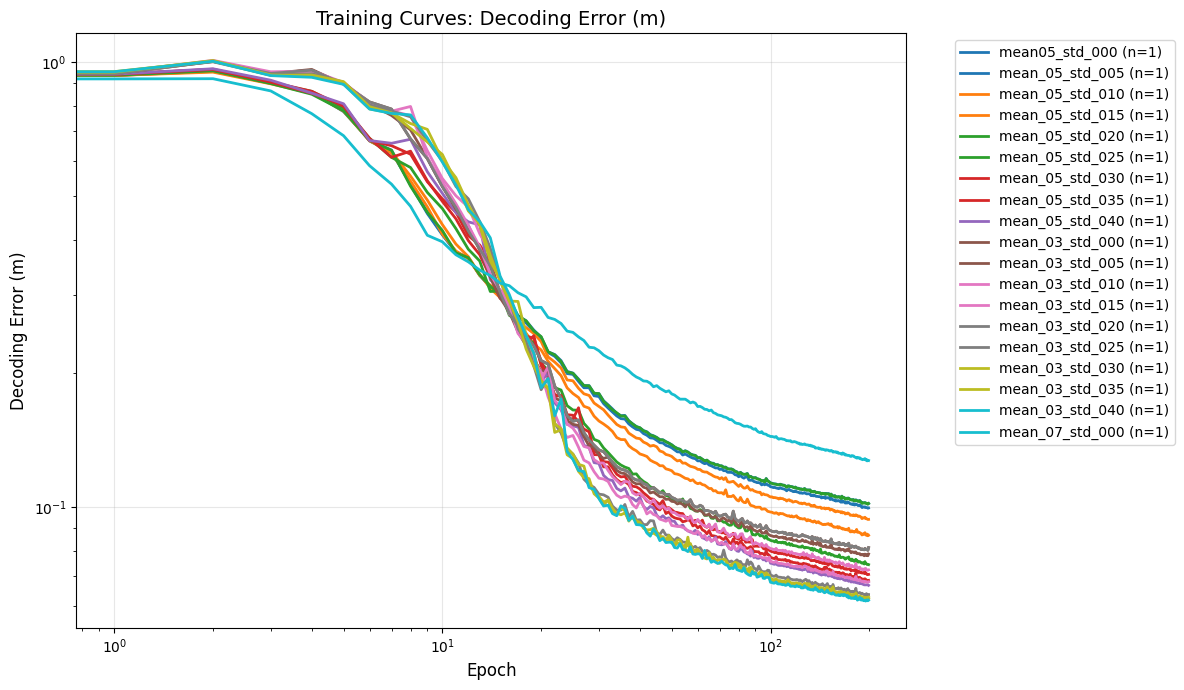

In [6]:
plot_training_curves_sweep(models, metric="decoding_error", log_x=True, log_y=True)